# 📘 K-Means 聚类算法

---

## 1️⃣ 什么是聚类？

聚类是一种**无监督学习**任务，目标是在没有标签的情况下，将数据划分成若干“相似度高”的组（簇，clusters）。

K-Means 是最基础的聚类算法之一，通过反复调整“中心点”和“簇分配”来最小化簇内距离。

---

## 2️⃣ K-Means 核心思想

K-Means 尝试最小化以下目标函数（簇内平方误差）：

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

其中：
- $( K $)：簇的数量
- $\mu_k \ $：第 $ k $ 个簇的中心
- $ C_k $：第 $ k $ 个簇内的样本集合

---

## 3️⃣ 算法步骤（迭代收敛）

1. 初始化 K 个簇中心（随机选 K 个点）
2. **Assignment Step**：
   - 将每个样本分配给最近的簇中心
3. **Update Step**：
   - 更新每个簇中心为该簇所有点的均值
4. 重复步骤 2-3 直到收敛（簇不变或达到最大迭代）

---

## 4️⃣ 超参数与技巧

### ✅ 超参数：K 值（簇的数量）

- 过小 → 欠聚类（粗糙）
- 过大 → 过聚类（噪声）
- 🎯 可使用 **肘部法则（Elbow Method）** 来估算合适的 K

### ✅ 初始化方法

- `random`：随机选 K 个点（可能陷入局部最优）
- `k-means++`：改进初始化策略，效果更稳定（默认）

---

## 5️⃣ 优缺点总结

| 优点                         | 缺点                                      |
|------------------------------|-------------------------------------------|
| ✅ 简单、计算高效             | ❌ 对初始中心敏感（可能陷局部最优）        |
| ✅ 可扩展到大数据             | ❌ 需手动指定簇数 K                        |
| ✅ 有清晰的目标函数（可优化） | ❌ 只适用于球形簇（欧几里得距离），对噪声敏感 |

---

## 6️⃣ 常见面试问题

### Q1: K-Means 是监督学习吗？
不是，它是无监督学习。没有训练标签。

### Q2: 如何选择合适的 K？
使用 **肘部法则**：画出 K 对应的总误差平方和（SSE），找到拐点。

### Q3: 为什么 K-Means 对初始值敏感？
因为中心初始化不同，最终可能落在不同的局部最小值，解决方式是多次运行取最优或使用 `k-means++`。

### Q4: K-Means 能用于文本、图像吗？
可以，用 TF-IDF、词向量或像素值作为输入向量，适当归一化后聚类。

### Q5: 是否可以用于非凸簇结构？
不适合。K-Means 假设簇为“类球形”结构，无法处理如月牙形、异形簇，需改用 DBSCAN、Spectral Clustering。

---

## 7️⃣ 可视化举例

可以用散点图 + 颜色区分聚类结果，或者绘制中心点路径演化过程（如果特征降维到 2D）


In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from unsup_data_pipeline import load_country_data, build_unsupervised_pipeline

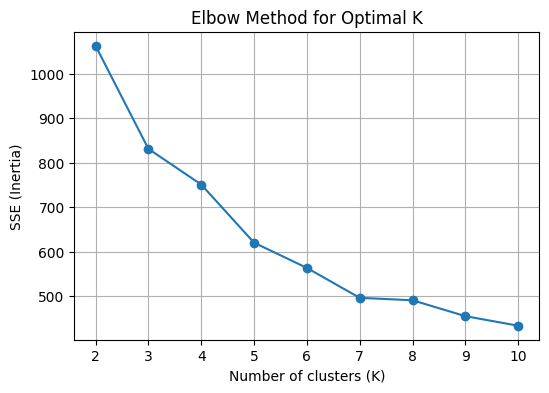

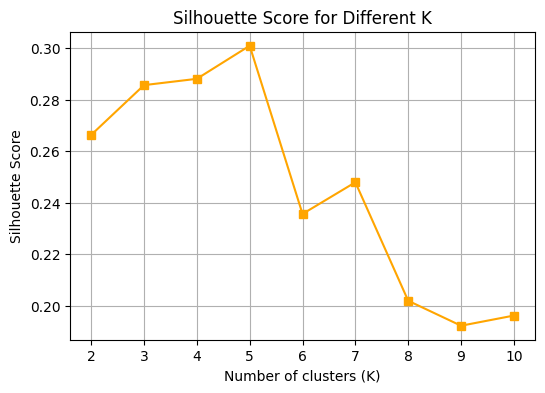

In [5]:
df_raw, features = load_country_data("unsup_data/Country-data.csv")
preprocessor = build_unsupervised_pipeline()

# 2️⃣ 预处理特征
X_scaled = preprocessor.fit_transform(features)

# 3️⃣ 肘部法选择最佳聚类数 K
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

# 4️⃣ Silhouette Score
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(k_range, silhouette_scores, marker='s', color='orange')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K")
plt.grid(True)
plt.show()

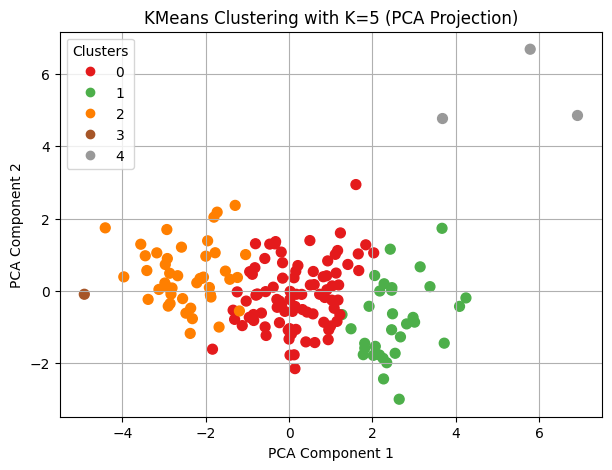

In [6]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# PCA 降维可视化
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=50)
plt.title(f"KMeans Clustering with K={best_k} (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()